In [1]:
import pandas as pd
file = './data/MOE_GRID_1078.xlsx'
df = pd.read_excel(open(file, "rb"))

rd = {"DESCRIPTOR" : "GRID_DESCRIPTOR"}
df.rename(columns = rd, inplace=True)

for v in df.columns:
    print("\""+v+"\"")


"Unnamed: 0"
"Unnamed: 0.1"
"UNIQUEID"
"SMILE"
"SETID"
"GRID_DESCRIPTOR"
"LOGD"
"mol"
"AM1_dipole"
"AM1_E"
"AM1_Eele"
"AM1_HF"
"AM1_HOMO"
"AM1_IP"
"AM1_LUMO"
"apol"
"ASA"
"ASA+"
"ASA-"
"ASA_H"
"ASA_P"
"ast_fraglike"
"ast_fraglike_ext"
"ast_violation"
"ast_violation_ext"
"a_acc"
"a_acid"
"a_aro"
"a_base"
"a_count"
"a_don"
"a_donacc"
"a_heavy"
"a_hyd"
"a_IC"
"a_ICM"
"a_nB"
"a_nBr"
"a_nC"
"a_nCl"
"a_nF"
"a_nH"
"a_nI"
"a_nN"
"a_nO"
"a_nP"
"a_nS"
"balabanJ"
"BCUT_PEOE_0"
"BCUT_PEOE_1"
"BCUT_PEOE_2"
"BCUT_PEOE_3"
"BCUT_SLOGP_0"
"BCUT_SLOGP_1"
"BCUT_SLOGP_2"
"BCUT_SLOGP_3"
"BCUT_SMR_0"
"BCUT_SMR_1"
"BCUT_SMR_2"
"BCUT_SMR_3"
"bpol"
"b_1rotN"
"b_1rotR"
"b_ar"
"b_count"
"b_double"
"b_heavy"
"b_max1len"
"b_rotN"
"b_rotR"
"b_single"
"b_triple"
"CASA+"
"CASA-"
"chi0"
"chi0v"
"chi0v_C"
"chi0_C"
"chi1"
"chi1v"
"chi1v_C"
"chi1_C"
"chiral"
"chiral_u"
"DASA"
"DCASA"
"dens"
"density"
"diameter"
"dipole"
"dipoleX"
"dipoleY"
"dipoleZ"
"E"
"E_ang"
"E_ele"
"E_nb"
"E_oop"
"E_rele"
"E_rnb"
"E_rsol"
"E_rvdw"
"E

In [2]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "a_base", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]

basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(df["UNIQUEID"]):
    
    fdesc = df[df["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = df[df["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = df[df["UNIQUEID"] == ss]['SETID'].values[0]
    uid = df[df["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)

    
for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 29)
GM  : 
   (1078,) (1078, 1908)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 29)
MTr  : 
   (865,) (865, 29)
GMTe  : 
   (213,) (213, 1908)
GMTr  : 
   (865,) (865, 1908)


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
import math

###################################################################################

def absdiff (yc, ytlist):
    diff = []
    for idx, v in enumerate(ytlist):
        d = math.fabs(v-yc[idx])
        diff.append(d)
            
    return np.average(diff), np.std(diff)

###################################################################################

def mainrunpls (X, Y, trname, tename, mcomp, cvlist, maxcomp=20):
    
    for cvval in cvlist:
        print("Running GRID model using cv = %3d"%(cvval))
    
        trscores = []
        trmses = []
        trncomps = []
    
        for trncomp in range(1,maxcomp+1):
            pls = PLSRegression(trncomp)
            pls.fit(X[trname], Y[trname])
        
            y_cv = cross_val_predict(pls, X[trname], Y[trname], cv=10)
            trscore = r2_score(Y[trname], y_cv)
            trmse = mean_squared_error(Y[trname], y_cv)
        
            trscores.append(trscore)
            trmses.append(trmse)
            trncomps.append(trncomp)
            print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
        msetrmin = np.argmin(trmses)
    
        plt.plot(trncomps, trscores, '-o', color='black')
        plt.xlabel('number of components tr')
        plt.ylabel('scores tr')
        plt.xticks(trncomps)
        plt.show()
    
        plt.plot(trncomps, trmses, '-o', color='black')
        plt.xlabel('number of components tr')
        plt.ylabel('MSE tr')
        plt.xticks(trncomps)
        plt.show()

        acomp = msetrmin+1
        print("Number of components selected automatically: ",  msetrmin+1)
        print("Number of components selected manually: ",  mcomp)
        
        pls_auto = PLSRegression(acomp)
        pls_auto.fit(X[trname], Y[trname])
        y_auto_te = pls_auto.predict(X[tename])
        y_auto_tr = pls_auto.predict(X[trname])
        y_auto = np.concatenate((y_auto_te, y_auto_tr))
        y_auto_true = []
        y_auto_true.extend(Y[tename])
        y_auto_true.extend(Y[trname])
        
        avg, std = absdiff (y_auto_te, Y[tename])
        print("Auto model  TestSet %10.5f %10.5f"%(avg, std))
        avg, std = absdiff (y_auto_tr, Y[trname])
        print("Auto model TrainSet %10.5f %10.5f"%(avg, std))
        avg, std = absdiff (y_auto, y_auto_true)
        print("Auto model  FullSet %10.5f %10.5f"%(avg, std))
        
        pls_manu = PLSRegression(mcomp)
        pls_manu.fit(X[trname], Y[trname])
        y_manu_te = pls_auto.predict(X[tename])
        y_manu_tr = pls_auto.predict(X[trname])
        y_manu = np.concatenate((y_manu_te, y_manu_tr))
        y_manu_true = []
        y_manu_true.extend(Y[tename])
        y_manu_true.extend(Y[trname])
        
        avg, std = absdiff (y_manu_te, Y[tename])
        print("Manual model  TestSet %10.5f %10.5f"%(avg, std))
        avg, std = absdiff (y_manu_tr, Y[trname])
        print("Manual model TrainSet %10.5f %10.5f"%(avg, std))
        avg, std = absdiff (y_manu, y_manu_true)
        print("Manual model  FullSet %10.5f %10.5f"%(avg, std))


###################################################################################



Running GRID model using cv =   5
   1 1.87513100 0.46408395
   2 1.46879385 0.58021589
   3 1.32194448 0.62218573
   4 1.21643614 0.65234021
   5 1.21652130 0.65231587
   6 1.21332723 0.65322874
   7 1.21297459 0.65332953
   8 1.21161278 0.65371874
   9 1.21296449 0.65333242
  10 1.21329547 0.65323782
  11 1.21442555 0.65291484
  12 1.21437165 0.65293025
  13 1.21422757 0.65297143
  14 1.21431839 0.65294547
  15 1.21432903 0.65294243
  16 1.21433783 0.65293991
  17 1.21433305 0.65294128
  18 1.21433814 0.65293982
  19 1.21434044 0.65293917
  20 1.21434038 0.65293918


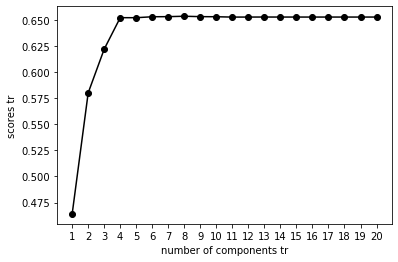

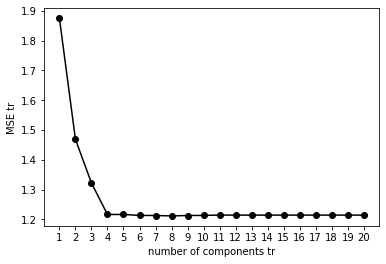

Number of components selected automatically:  8
Number of components selected manually:  4
Auto model  TestSet    0.60622    0.52400
Auto model TrainSet    0.01684    0.01376
Auto model  FullSet    0.13330    0.33088
Manual model  TestSet    0.60622    0.52400
Manual model TrainSet    0.01684    0.01376
Manual model  FullSet    0.13330    0.33088
Running GRID model using cv =  10
   1 1.87513100 0.46408395
   2 1.46879385 0.58021589
   3 1.32194448 0.62218573
   4 1.21643614 0.65234021
   5 1.21652130 0.65231587
   6 1.21332723 0.65322874
   7 1.21297459 0.65332953
   8 1.21161278 0.65371874
   9 1.21296449 0.65333242
  10 1.21329547 0.65323782
  11 1.21442555 0.65291484
  12 1.21437165 0.65293025
  13 1.21422757 0.65297143
  14 1.21431839 0.65294547
  15 1.21432903 0.65294243
  16 1.21433783 0.65293991
  17 1.21433305 0.65294128
  18 1.21433814 0.65293982
  19 1.21434044 0.65293917
  20 1.21434038 0.65293918


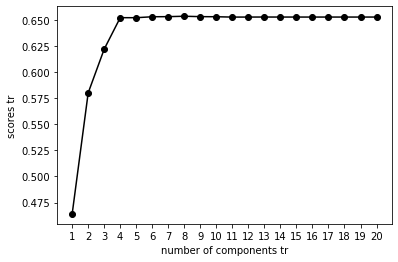

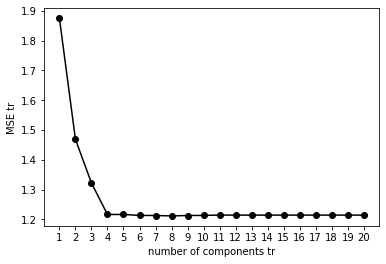

Number of components selected automatically:  8
Number of components selected manually:  4
Auto model  TestSet    0.60622    0.52400
Auto model TrainSet    0.01684    0.01376
Auto model  FullSet    0.13330    0.33088
Manual model  TestSet    0.60622    0.52400
Manual model TrainSet    0.01684    0.01376
Manual model  FullSet    0.13330    0.33088


In [51]:
trname = "GTr"
tename = "GTe"
mcomp = 4
cvlist = [5, 10]

mainrunpls (X, Y, trname, tename, mcomp, cvlist, 20)